In [ ]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical


In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
#Load the data and split it into train and test datasets
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


**Visualizing The image Data**

In [ ]:
#Get the image shape
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
#TAke a look at first image at index=0
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
y_train[0]

5

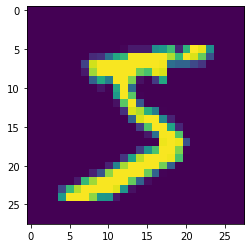

In [ ]:
#show image as picture
plt.imshow(x_train[0])

In [ ]:
#Reshape the data to fit  the model
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)


**One HotEncoding**

In [ ]:
y_train_one_hot = to_categorical(y_train)

In [ ]:
y_test_one_hot = to_categorical(y_test)

In [ ]:
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
#Build the  CNN Model
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten


In [ ]:
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [ ]:
#Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


**Training The Model**

In [ ]:
hist = model.fit(x_train,y_train_one_hot,validation_data = (x_test,y_test_one_hot),epochs=3)

Epoch 1/3
1875/1875 [==============================] - 167s 89ms/step - loss: 0.1209 - accuracy: 0.9647 - val_loss: 0.0863 - val_accuracy: 0.9726
Epoch 2/3
1875/1875 [==============================] - 167s 89ms/step - loss: 0.0646 - accuracy: 0.9804 - val_loss: 0.0827 - val_accuracy: 0.9740
Epoch 3/3
1875/1875 [==============================] - 167s 89ms/step - loss: 0.0498 - accuracy: 0.9837 - val_loss: 0.0804 - val_accuracy: 0.9747


# New Section

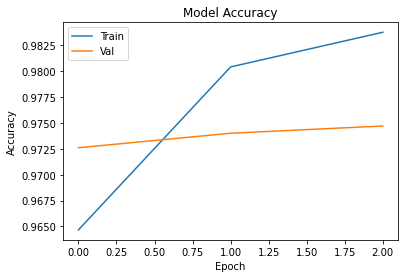

In [ ]:
#visulaize the model accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc ='upper left')
plt.show()

In [ ]:
#Show predictions as probabilities for the first 4 images in the test set
predicions = model.predict(x_test[:4])

In [ ]:
predicions

array([[4.00424582e-08, 4.10514201e-12, 1.21601190e-07, 1.13167317e-07,
        5.05623668e-11, 1.57122648e-11, 5.05438953e-17, 9.99999642e-01,
        3.50227793e-08, 5.33750537e-08],
       [1.11940494e-06, 1.25130187e-04, 9.98378754e-01, 1.97309333e-07,
        3.85160931e-10, 1.90448048e-08, 1.47408398e-03, 1.04072133e-11,
        2.07372250e-05, 1.39979001e-10],
       [4.47872033e-08, 9.99856353e-01, 6.35256720e-06, 1.40868522e-07,
        1.07169326e-04, 2.07634983e-07, 1.18848193e-05, 5.96094424e-06,
        1.18493281e-05, 8.91028640e-10],
       [9.99933362e-01, 5.52786428e-10, 1.18147282e-05, 1.55780860e-10,
        6.46818492e-08, 2.65467968e-08, 8.05604259e-07, 2.85040880e-08,
        2.16892954e-06, 5.17005719e-05]], dtype=float32)

In [ ]:
#print our predictions as number labels
print(np.argmax(predicions,axis = 1))

#Print the actual labels
print(y_test[:4])

[7 2 1 0]
[7 2 1 0]
